In [63]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import random
import librosa
import os
import pandas as pd

awake_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/awake'
diaper_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/diaper'
etc_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/etc'
hug_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/hug'
hungry_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/hungry'
sad_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/sad'
sleepy_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/sleepy'
uncomfortable_dir = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/data/uncomfortable'

os.makedirs(awake_dir, exist_ok=True)
os.makedirs(diaper_dir, exist_ok=True)
os.makedirs(etc_dir, exist_ok=True)
os.makedirs(hug_dir, exist_ok=True)
os.makedirs(hungry_dir, exist_ok=True)
os.makedirs(sad_dir, exist_ok=True)
os.makedirs(sleepy_dir , exist_ok=True)
os.makedirs(uncomfortable_dir, exist_ok=True)



In [2]:
dir = {awake_dir,diaper_dir,etc_dir,hug_dir,hungry_dir,sad_dir,sleepy_dir,uncomfortable_dir}

In [3]:
audios = {}
for directory in dir:
    new_list = [] 
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                audio_path = os.path.join(root, file)
                audio, sr = librosa.load(audio_path, sr=16000)
                new_list.append(audio)
    print(new_list)
    audios[directory] = new_list 

[array([-0.00189209,  0.00082397,  0.00039673, ...,  0.06390381,
        0.02154541, -0.00714111], dtype=float32), array([ 0.0050354 ,  0.00744629,  0.01010132, ..., -0.17224121,
       -0.18017578, -0.08895874], dtype=float32), array([-0.13250732, -0.14782715, -0.15737915, ...,  0.00082397,
        0.00036621,  0.00027466], dtype=float32), array([-0.02911377,  0.03601074,  0.10879517, ..., -0.00909424,
       -0.00802612, -0.00790405], dtype=float32), array([-0.01171875, -0.01428223, -0.01583862, ..., -0.00537109,
       -0.00485229, -0.00454712], dtype=float32), array([ 0.02987671, -0.01739502, -0.04711914, ...,  0.07772827,
        0.09072876,  0.08688354], dtype=float32), array([-0.53274536, -0.15182495,  0.15472412, ..., -0.07162476,
       -0.04403687, -0.01605225], dtype=float32), array([ 0.00286865, -0.00054932, -0.0007019 , ...,  0.02490234,
        0.00488281,  0.03198242], dtype=float32), array([0.00036621, 0.00042725, 0.00247192, ..., 0.00112915, 0.00146484,
       0.000976

[array([-0.03326416, -0.03286743, -0.03384399, ..., -0.00073242,
       -0.00091553, -0.00115967], dtype=float32), array([-0.074646  , -0.04052734,  0.03662109, ...,  0.00256348,
        0.0015564 ,  0.00064087], dtype=float32), array([-7.1044922e-02, -3.4301758e-02, -6.0729980e-03, ...,
       -1.0986328e-03, -8.2397461e-04, -6.1035156e-05], dtype=float32), array([0.19763184, 0.15966797, 0.12890625, ..., 0.05093384, 0.01574707,
       0.01199341], dtype=float32), array([ 0.16015625,  0.06976318,  0.01184082, ..., -0.08334351,
       -0.09829712, -0.13739014], dtype=float32), array([-0.02053833, -0.02301025, -0.01901245, ...,  0.13226318,
        0.15335083,  0.1366272 ], dtype=float32), array([-0.09869385, -0.10421753, -0.08950806, ..., -0.14996338,
       -0.13238525, -0.1048584 ], dtype=float32), array([-0.30914307,  0.15631104,  0.28430176, ...,  0.4230957 ,
        0.5836487 ,  0.05960083], dtype=float32), array([-0.00033569, -0.00042725, -0.00012207, ..., -0.01235962,
       -0.0

[array([ 0.07492065,  0.11413574,  0.13827515, ...,  0.01089478,
        0.00714111, -0.00140381], dtype=float32), array([-0.04998779, -0.06616211, -0.07351685, ...,  0.00204468,
        0.04293823,  0.07989502], dtype=float32), array([ 0.00311279,  0.00967407,  0.01165771, ...,  0.04177856,
       -0.03521729, -0.10076904], dtype=float32), array([ 0.00976562,  0.02047729,  0.02819824, ..., -0.10836792,
       -0.25494385, -0.17132568], dtype=float32), array([-0.08370972, -0.20013428, -0.2508545 , ...,  0.1749878 ,
        0.16851807,  0.16363525], dtype=float32), array([ 0.05990601,  0.06848145,  0.07235718, ..., -0.00076294,
       -0.00125122, -0.00094604], dtype=float32), array([ 0.00384521,  0.00311279,  0.00421143, ..., -0.00061035,
       -0.00125122, -0.00024414], dtype=float32), array([ 0.0020752 ,  0.00219727,  0.00228882, ..., -0.0005188 ,
        0.00012207,  0.00021362], dtype=float32), array([ 0.02529907,  0.01712036,  0.00488281, ..., -0.00106812,
       -0.00100708, -0.

[array([ 0.        ,  0.        ,  0.        , ..., -0.0144043 ,
       -0.01092529, -0.0083313 ], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([ 0.00012207,  0.00082397,  0.00076294, ..., -0.00015259,
       -0.00018311, -0.00018311], dtype=float32), array([0.        , 0.        , 0.        , ..., 0.03146362, 0.02310181,
       0.01556396], dtype=float32), array([ 0.00164795, -0.00158691, -0.00592041, ...,  0.00485229,
        0.00442505,  0.00216675], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00,  3.0517578e-05, ...,
       -7.6293945e-04, -7.3242188e-04, -6.4086914e-04], dtype=float32), array([ 4.5776367e-04,  3.3569336e-04,  6.1035156e-05, ...,
       -8.8806152e-03, -1.3702393e-02, -1.6296387e-02], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00, -6.1035156e-05, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00,  0.00000

[array([-0.01504517,  0.01190186,  0.03543091, ...,  0.00769043,
        0.01220703,  0.01797485], dtype=float32), array([-0.00048828, -0.00021362,  0.        , ..., -0.00567627,
       -0.03335571, -0.03546143], dtype=float32), array([0.03253174, 0.10205078, 0.20681763, ..., 0.02618408, 0.08084106,
       0.03796387], dtype=float32), array([-0.20730591, -0.2520752 , -0.2753296 , ..., -0.01412964,
       -0.00445557,  0.01193237], dtype=float32), array([ 0.03045654,  0.04351807,  0.04293823, ..., -0.05047607,
       -0.03637695, -0.02752686], dtype=float32), array([ 0.0000000e+00, -3.0517578e-05,  1.2207031e-04, ...,
       -1.6683960e-01,  5.5908203e-02,  2.3962402e-01], dtype=float32), array([-0.03121948, -0.07885742, -0.05737305, ...,  0.14456177,
        0.16079712,  0.1696167 ], dtype=float32), array([-0.03149414, -0.03070068, -0.03033447, ...,  0.00018311,
        0.00027466, -0.00183105], dtype=float32), array([ 0.        ,  0.        ,  0.        , ...,  0.02954102,
        0.0

[array([ 0.03189087, -0.00576782, -0.05734253, ...,  0.04769897,
        0.05090332,  0.03939819], dtype=float32), array([ 0.00161743,  0.00302124,  0.00448608, ..., -0.03845215,
        0.00808716, -0.00048828], dtype=float32), array([ 0.01412964,  0.01062012,  0.00637817, ..., -0.06002808,
       -0.04199219, -0.01144409], dtype=float32), array([ 0.01281738,  0.02233887,  0.00680542, ..., -0.0246582 ,
       -0.00646973, -0.01205444], dtype=float32), array([ 0.01400757,  0.02368164,  0.02023315, ..., -0.02346802,
       -0.01324463, -0.0090332 ], dtype=float32), array([0.01498413, 0.02896118, 0.04074097, ..., 0.06304932, 0.06280518,
       0.0553894 ], dtype=float32), array([ 0.00845337, -0.0083313 , -0.01065063, ..., -0.00848389,
       -0.01394653, -0.02844238], dtype=float32), array([-0.00366211, -0.00390625, -0.01705933, ..., -0.01339722,
       -0.03704834, -0.02651978], dtype=float32), array([ 0.00180054,  0.00250244,  0.00219727, ..., -0.00195312,
       -0.00213623, -0.001770

[array([ 0.04156494,  0.00708008, -0.0262146 , ..., -0.02178955,
       -0.02294922, -0.02243042], dtype=float32), array([-0.03610229, -0.02835083,  0.03097534, ..., -0.01040649,
       -0.0088501 ,  0.00836182], dtype=float32), array([ 0.00543213,  0.00787354,  0.00982666, ..., -0.05734253,
        0.0178833 , -0.01016235], dtype=float32), array([-0.02780151,  0.00131226,  0.02798462, ...,  0.03598022,
        0.0428772 ,  0.06256104], dtype=float32), array([ 0.00280762,  0.00344849,  0.00332642, ...,  0.01419067,
        0.04598999, -0.00485229], dtype=float32), array([-0.15081787, -0.18060303, -0.20581055, ..., -0.00204468,
       -0.00140381, -0.00140381], dtype=float32), array([ 0.03771973,  0.04489136,  0.04797363, ...,  0.06124878,
       -0.05749512, -0.1295166 ], dtype=float32), array([-0.06417847, -0.07928467, -0.0899353 , ..., -0.00177002,
       -0.0020752 , -0.00204468], dtype=float32), array([-0.00231934,  0.00863647,  0.00100708, ...,  0.00643921,
       -0.01739502, -0.

[array([ 0.00750732, -0.04580688, -0.03945923, ...,  0.07766724,
        0.21115112,  0.2371521 ], dtype=float32), array([ 0.0508728 ,  0.0446167 ,  0.04455566, ..., -0.00161743,
       -0.00372314, -0.00405884], dtype=float32), array([ 0.01559448, -0.01782227, -0.0763855 , ...,  0.04980469,
        0.04998779,  0.0350647 ], dtype=float32), array([ 0.16638184,  0.19909668,  0.19525146, ..., -0.00967407,
       -0.00268555, -0.00967407], dtype=float32), array([-0.00094604,  0.00021362,  0.00164795, ...,  0.11682129,
        0.11453247,  0.0322876 ], dtype=float32), array([ 0.00219727, -0.00091553, -0.00259399, ..., -0.04043579,
       -0.05688477, -0.04797363], dtype=float32), array([-0.00616455, -0.00250244, -0.00177002, ..., -0.22247314,
       -0.1743164 , -0.18991089], dtype=float32), array([-0.00549316, -0.00665283, -0.00570679, ...,  0.05731201,
       -0.03768921, -0.06661987], dtype=float32), array([-1.9836426e-03,  9.9182129e-03,  3.1127930e-03, ...,
       -1.2207031e-04,  4.5

In [4]:
new_keys = {
'hungry' :'/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/hungry',
'uncomfortable' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/uncomfortable',
'etc' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/etc',
'awake' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/awake',
'diaper' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/diaper', 
'sleepy' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/sleepy',
'hug' : '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/hug',
'sad' :  '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/data/sad'
}

In [5]:
updated_audios = {new_key: audios[old_key] for new_key, old_key in new_keys.items()}

In [6]:
updated_audios.keys()

dict_keys(['hungry', 'uncomfortable', 'etc', 'awake', 'diaper', 'sleepy', 'hug', 'sad'])

In [60]:
output_directory = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification-main/trans_data2'

def spec_augment(spec):
    # Applying time warping
    warp_value = np.random.randint(1, 20)  # Randomly select a warping value
    warped_spec = np.roll(spec, shift=warp_value, axis=1)  # Shift along the time axis

    # Applying frequency masking
    freq_mask_value = np.random.randint(5, 15)  # Randomly select a frequency masking value
    freq_mask_range = np.random.randint(0, spec.shape[0] - freq_mask_value)
    warped_spec[freq_mask_range:freq_mask_range + freq_mask_value, :] = 0

    # Applying time masking
    time_mask_value = np.random.randint(5, 20)  # Randomly select a time masking value
    time_mask_range = np.random.randint(0, spec.shape[1] - time_mask_value)
    warped_spec[:, time_mask_range:time_mask_range + time_mask_value] = 0
    
    return warped_spec
    
orgaug = pd.DataFrame(columns=['key', 'index', 'original', 'augmented'])
for key in updated_audios.keys():
    for i in range(len(updated_audios[key])):
        audio = updated_audios[key][i]  # Assuming your audio data is here
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=16000)
        log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
        augmented_spec = spec_augment(log_mel_spectrogram)  # Apply augmentation
        orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)

    print("good")

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

good


/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augmented': augmented_spec}, ignore_index=True)
/var/folders/dx/8s0k19bn79q6760b0f0xv0_w0000gn/T/ipykernel_23439/3565503733.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  orgaug = orgaug.append({'key': key, 'index': i, 'original': log_mel_spectrogram, 'augm

In [75]:
output_file_path = '/Users/lobeli/Desktop/hear_ease-infant_crying_classification/trans_data2/augmel.csv'
orgaug.to_csv(output_file_path, index=False) 

여기서 원래는 원본 데이터가지고 증강할까 했는데 아직 증강은 하지 않은 상태인듯해서 그냥 일단 
스펙트로그램으로 해서 증강을 해보았습니다. 
specaugment로 데이터 증강한다음 하나의 칼럼에는 오리지널을 넣었고, 다른 하나의 칼럼에는 증강된 걸 넣었습니다. 

In [62]:
orgaug.head(10)

,key,index,original,augmented
0,hungry,0,"[[-50.053894, -50.11122, -64.729645, -75.10511...","[[-80.0, -80.0, -80.0, -50.053894, -50.11122, ..."
1,hungry,1,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -68.21278...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
2,hungry,2,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
3,hungry,3,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
4,hungry,4,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
5,hungry,5,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
6,hungry,6,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
7,hungry,7,"[[-78.40615, -80.0, -80.0, -80.0, -80.0, -80.0...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -78.40615..."
8,hungry,8,"[[-80.0, -80.0, -80.0, -80.0, -72.208824, -60....","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
9,hungry,9,"[[-62.755005, -70.21575, -76.47421, -76.30917,...","[[-75.32585, -74.98021, -77.254, -80.0, -80.0,..."


In [65]:
category_to_check = "hungry"  

category_df = orgaug[orgaug['key'] == category_to_check]

# Combine original and augmented data into a single array
all_data = np.concatenate((category_df['original'].values, category_df['augmented'].values), axis=0)

# Calculate pairwise cosine similarities
num_samples = len(all_data)
similarities = np.zeros((num_samples, num_samples))

for i in range(num_samples):
    for j in range(num_samples):
        similarities[i, j] = cosine_similarity([all_data[i].flatten()], [all_data[j].flatten()])[0, 0]

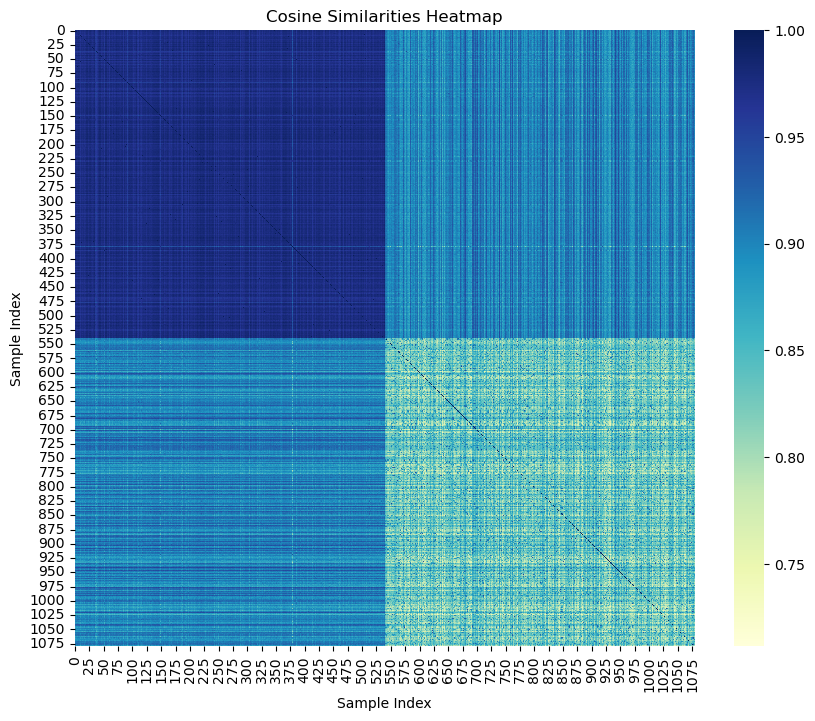

In [71]:
# Plot the heatmap of similarities
plt.figure(figsize=(10, 8))
sns.heatmap(similarities, cmap="YlGnBu")
plt.title("Cosine Similarities Heatmap")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.show()

이렇게 코사인 유사도가 나오는 것을 알 수 있음.

In [72]:
category_df 

,key,index,original,augmented
0,hungry,0,"[[-50.053894, -50.11122, -64.729645, -75.10511...","[[-80.0, -80.0, -80.0, -50.053894, -50.11122, ..."
1,hungry,1,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -68.21278...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
2,hungry,2,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
3,hungry,3,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
4,hungry,4,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
...,...,...,...,...
535,hungry,535,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
536,hungry,536,"[[-75.9695, -77.96875, -78.83019, -72.58016, -...","[[-78.64461, -80.0, -80.0, -80.0, -79.82378, -..."
537,hungry,537,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."
538,hungry,538,"[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8...","[[-80.0, -80.0, -80.0, -80.0, -80.0, -80.0, -8..."


내일 유사도 분석 진행 예정 

dict_keys(['hungry', 'uncomfortable', 'etc', 'awake', 'diaper', 'sleepy', 'hug', 'sad'])